# Mouse Drug Trials

   This is an analysis of eight potential cancer drugs that are being tested on lab mice that have tumors. The data was in the form of 2 csv files, one with data on the mice demographics and the other containing information about the mouse tumors, metastasis and drug regime. The two files were inner joined to create the data that will be used for the analysis. 

The data has been cleaned to remove mouse g989 as it had multiple entries for the same time points. 

    The number of mice used for each drug trial was not the same. The distribution of the sex of the mice was 51% male. The drugs Capomulin and Ramicane had over 200 mice each while Propriva had 150 after the removal of mouse g989. This suggests that either the study design was less concerned with ensuring that all drugs had mice that were the same in number (age and gender), average starting tumor volume and number of metastases, or that there was poor record keeping that resulted in observations of mouse progress were somehow favoring the labeling of the mice as mouse g989. 

    As for the effectiveness of the treatments, with the exceptions of Ramicane, Capomulin, Ceftamin and Infubinol all drugs had median tumor volumes that were 2mm^3 smaller than the mean tumor volume, indicating the average tumor volume is being dragged up by some very large tumors. Additionally, these drugs and Propriva had variances that were less than 44. Capomulin and Ramicine both had variances that were under 25. This indicates that the tumor volumes were more consistent in volume in the mice taking these drugs. All the other tested options had a variance between 48 and 69mm^3. The standard deviations for the tested drugs show the same pattern with Capomulin and Ramicine having the tightest distributions, followed by Ceftamin, Ifnubinol and Proprivia. The other tested treatments had a much wider range of outcomes.  

    The standard error, which is a measure of how likely it is that the results of the sample are representative of the entire population, has a wide range for these treatments. Capomulin and Ramicane have the lowest standard errors, which means that the means of our samples are the most likely of any of the treatments tested to have results that are close to the true population values. The next lowest values for standard error are for Ceftamin and Infubinol. The rest of the tested drugs have standard errors that exceed 0.5. The box and Wisker plots for all the drugs (cell 21 of this analysis, beneath cell 20 which has the box and Wisker plots for the four requested drugs regiments) Show a clearly the size of the disruptions in the final tumor volume. The smaller final tumor volumes are the best contenders for a cancer drug. 

    Capomulin, Ramicane, Infubinol, and Ceftamin are the drug regiments that have the tightest distribution as measures by the size of the variance, the standard deviation, and the standard error, as well as the lowest average tumor volumes and lowest median tumor volumes, all of which are promising for drugs that reliably reduce tumor volume in patents. The number and volume of metastasize were not considered in the setup of the requested calculations and would be worth considering in future analysis. 

    The dugs Capomulin, Ramicane, Infubinol, and Ceftamin Were the drugs that had further analysis requested. The only one of the for of these drugs to have an outlier is Infubinol, which has an outlier that is significantly lower in volume than the rest of the final tumor volumes. Examination of the distributions shows that Capomulin and Ramicane have final tumor volume distributions that are below even the lowest final tumor volumes of Infubinol and Ceftamin (except for the one mentioned outlier).  

    A Linnear regression was requested for the Capomulin treatment, this showed that the final tumor volume increased with the final weight of the mice. The slope of the calculated line was 1.75, which means that for every 1 gram increase in final mouse weight, the expected tumor volume would increase by 1.75 mm^3.   

In [1]:
#Sertup
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.datasets as dta
import scipy.stats as st
from scipy import stats
print("Success!!")

Success!!


In [2]:
#Getting data
mouse = pd.read_csv('../data/Mouse_metadata.csv')
mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
data = pd.read_csv('../data/Study_results.csv')
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#Join the two datasets, into combined data
mous_data = pd.merge(mouse, data, on ="Mouse ID")
mous_data.head()

mous_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Determin how many mice in original table
mouse.value_counts().count()

249

In [6]:
#check merged data
mous_check = mous_data['Mouse ID'].value_counts().count()
mous_check

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
tomato = mous_data[mous_data[['Mouse ID', 'Timepoint']].duplicated() == True]
#https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
tomato

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
#clean df
cleaned_df = mous_data.loc[mous_data["Mouse ID"] !='g989']
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
#clean df mouse count
cleaned_df['Mouse ID'].value_counts().count()

248

In [10]:
(cleaned_df['Mouse ID']=='g989').value_counts()

False    1880
Name: Mouse ID, dtype: int64

# Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
SD = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
var = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
S_error = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.
Sum_stat= pd.DataFrame({'Mean Tumor Volume':mean, 'Median Tumor Volume':median, 
                    'Vairance':var, 'Standard Deveation': SD, 'Standard Error': S_error})
Sum_stat

,Mean Tumor Volume,Median Tumor Volume,Vairance,Standard Deveation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

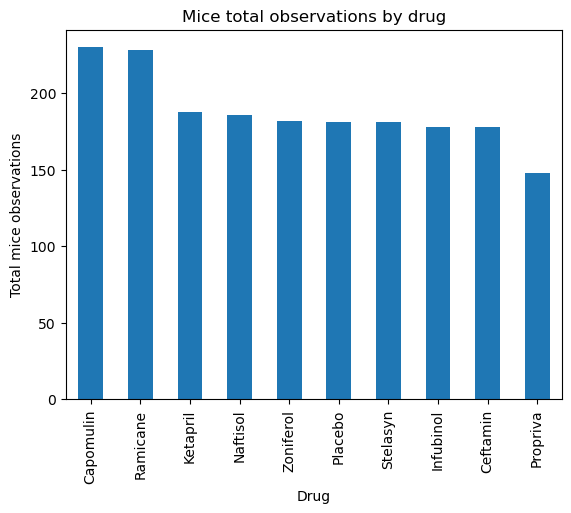

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

Pan_Bar = cleaned_df['Drug Regimen'].value_counts()

Pan_Bar.plot(kind="bar")

plt.title('Mice total observations by drug')
plt.xlabel('Drug')
plt.ylabel('Total mice observations')
plt.xticks(rotation=90)


plt.show()

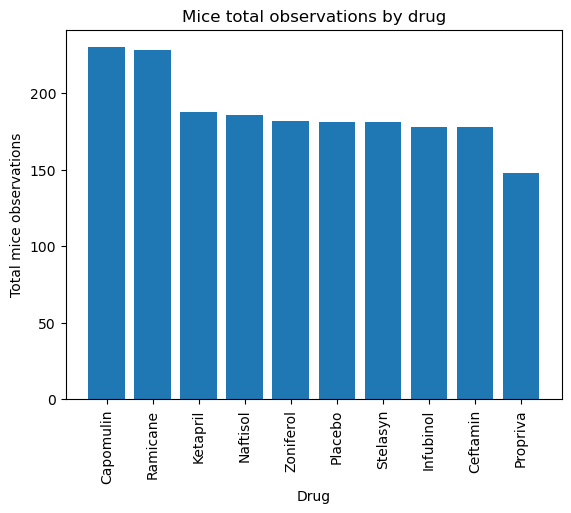

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Py_Bar = cleaned_df['Drug Regimen'].value_counts()
plt.bar(Py_Bar.index.values, Py_Bar.values)

plt.title('Mice total observations by drug')
plt.xlabel('Drug')
plt.ylabel('Total mice observations')
plt.xticks(rotation=90)


#plt.bar(Red)
plt.show()


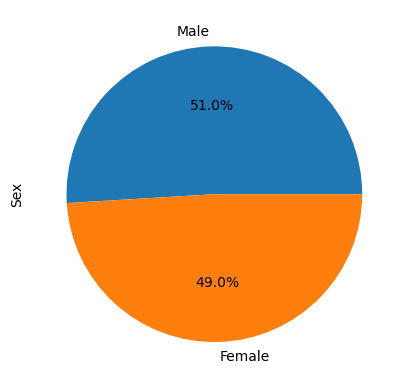

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Pan_pie = cleaned_df['Sex'].value_counts().plot(kind = 'pie', autopct="%1.1f%%")
plt.show()

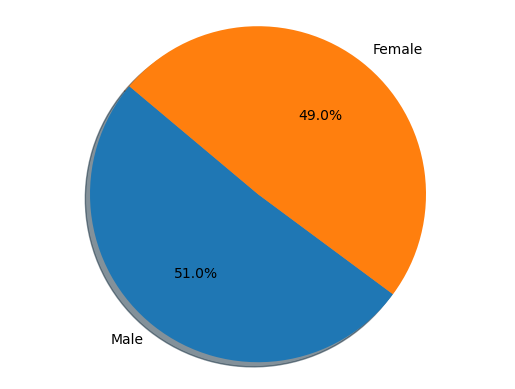

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
Mpie = cleaned_df['Sex'].value_counts()
plt.pie(Mpie.values, labels= Mpie.index.values, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")



plt.show()


# Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
L_Tim = cleaned_df.groupby('Mouse ID')['Timepoint'].max()
# reset indez=x for new df
L_Tim = L_Tim.reset_index()
# get other info for mice


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data = L_Tim.merge(cleaned_df,on=['Mouse ID','Timepoint'],how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
Tumor_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
    tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    Tumor_list.append(tumor_vol)
    
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #print(f"Values below {lower_bound} could be outliers.")
    #print(f"Values above {upper_bound} could be outliers.")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group

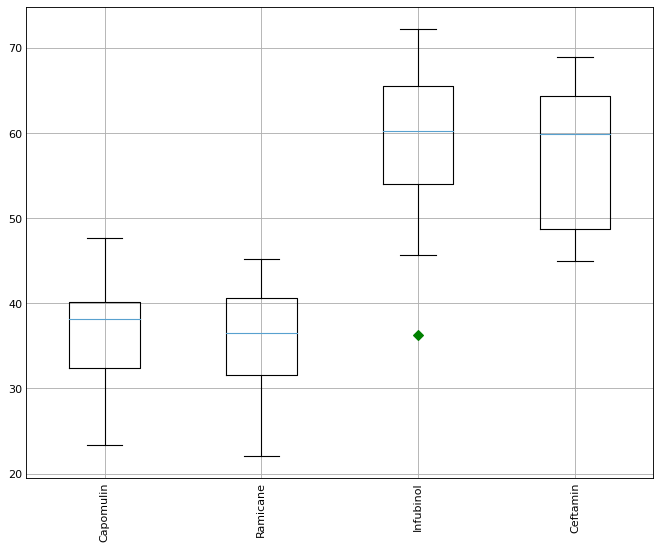

In [47]:
# resizeing the figure
plt.figure(figsize=(8, 6), dpi=80)

#box plot for each treatment
# https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py
plt.style.use('_mpl-gallery')

# Format Data, List of tratemtnes to lable
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Data for each of the 4 box plots
D = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin", 'Tumor Volume (mm3)']
E = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane", 'Tumor Volume (mm3)']
F = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol", 'Tumor Volume (mm3)']
G = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin", 'Tumor Volume (mm3)']

#put in list form, so it can be passed to the boxplot function
data = [D,E,F,G]
# plot

plt.boxplot(data,  0, 'gD', labels = treatment_list)
# rotate x-labels so they can be read
plt.xticks(rotation = 90)


plt.show()

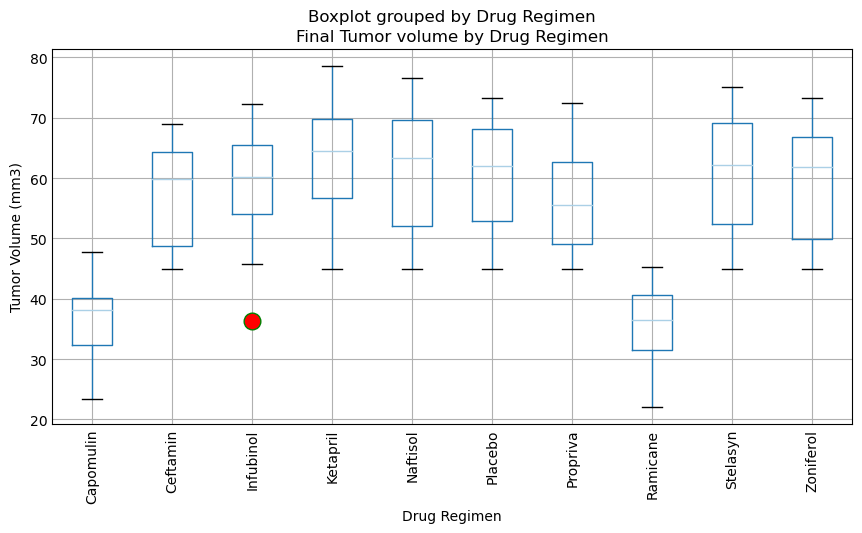

In [21]:
# The boxplots for all the drug tratemtns
#change olutlier color
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
# https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib

ax= merged_data.boxplot(column ="Tumor Volume (mm3)", by = 'Drug Regimen', 
                        figsize = (10,5),flierprops=flierprops)
#labeling
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Final Tumor volume by Drug Regimen')
#label rotation so they can be read
plt.xticks(rotation = 90)

plt.show()

# Line and Scatter Plots

In [22]:
#Dataframe with only the Capomulin mice
Cap_mice = pd.DataFrame(merged_data[(merged_data['Mouse ID'].values) 
                                   &(merged_data['Drug Regimen']== 'Capomulin')])
Cap_mice

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


<function matplotlib.pyplot.show(close=None, block=None)>

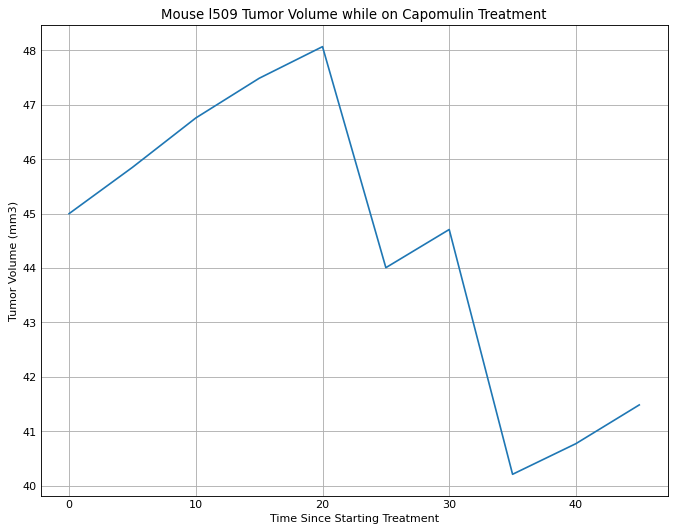

In [46]:
# resizeing the figure
plt.figure(figsize=(8, 6), dpi=80)

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#
In_mous = pd.DataFrame(cleaned_df.loc[cleaned_df['Mouse ID']=='l509'])
x_values = In_mous['Timepoint']
y_values = In_mous['Tumor Volume (mm3)']
plt.plot(x_values, y_values)


plt.title('Mouse l509 Tumor Volume while on Capomulin Treatment')
plt.xlabel('Time Since Starting Treatment')
plt.ylabel('Tumor Volume (mm3)')

plt.show

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume 
#for the entire Capomulin regimen


# Ask about this

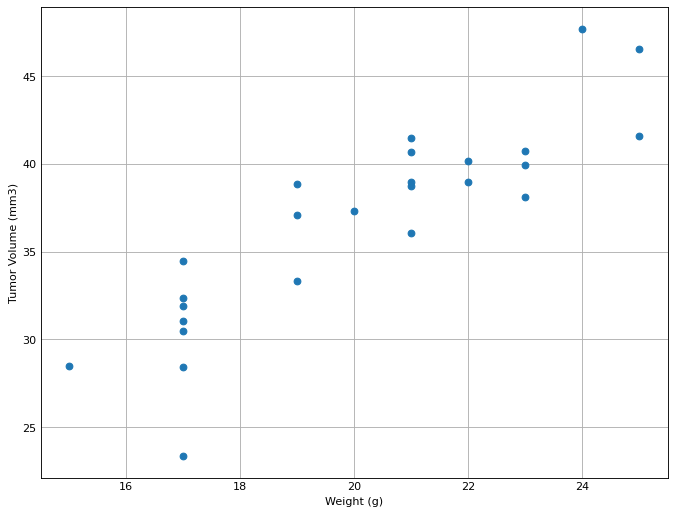

In [45]:
# resizeing the figure
plt.figure(figsize=(8, 6), dpi=80)

# Final tumor vloume used because if you use all the tumor masses you get a differnt graph
plt.scatter(Cap_mice['Weight (g)'], Cap_mice['Tumor Volume (mm3)'])

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

# Correlation and Regression

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
st.pearsonr(Cap_mice['Weight (g)'],Cap_mice['Tumor Volume (mm3)'])

PearsonRResult(statistic=0.8767060403658116, pvalue=9.084429088673465e-09)

In [27]:
# use scipy for linnear regession
C_mous_slope, C_mous_int, C_mous_r, C_mous_p, C_mous_std_err = stats.linregress(Cap_mice['Weight (g)'],Cap_mice['Tumor Volume (mm3)'])
C_mous_r

0.8767060403658119

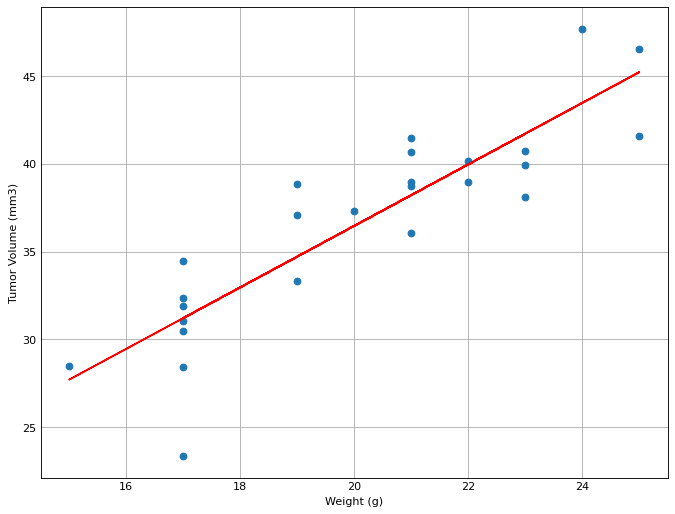

In [44]:
# Create equation of line to calculate predicted tumor volume given mouse weight
# Set up eqation for the line from the regreaaion, using the slope, the calulated intercept, and the weights of the mice
C_mous_fit = C_mous_slope * Cap_mice['Weight (g)'] + C_mous_int

# resizeing the figure
plt.figure(figsize=(8, 6), dpi=80)
#https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib

#line equation display
line_eq = "y = " + str(round(C_mous_slope,2)) + "x + " + str(round(C_mous_int,2))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Plot the regreaaion line using the mice weights for the x_value and the calulated line y-value
plt.plot(Cap_mice['Weight (g)'], C_mous_fit, color="red")



# the scatter plot from above, so it will be on the same graph as the regression line
# Final tumor vloume used because if you use all the tumor masses you get a differnt graph
plt.scatter(Cap_mice['Weight (g)'], Cap_mice['Tumor Volume (mm3)'])

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")



plt.show()

In [29]:
line_eq

'y = 1.75x + 1.45'